.

Import libraries

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler


In [20]:
df = pd.read_csv('cinemaTicket_Ref.csv')

In [21]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [23]:
df.shape

(142524, 14)

In [24]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [25]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

 1- Handling missing values.

We will replace the null values under "occu_perc" and "capacity" column with mean value of children

In [26]:
df['occu_perc'].fillna(df['occu_perc'].mean(), inplace = True)
df['capacity'].fillna(df['capacity'].mean(), inplace = True)

In [27]:
df.isna().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [28]:
#df.dropna(axis=0, inplace=True)
#df.isnull().sum()

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df.dtypes

film_code                int64
cinema_code              int64
total_sales              int64
tickets_sold             int64
tickets_out              int64
show_time                int64
occu_perc              float64
ticket_price           float64
ticket_use               int64
capacity               float64
date            datetime64[ns]
month                    int64
quarter                  int64
day                      int64
dtype: object

2-Removing duplicate rows if any

In [31]:
df.duplicated().sum()

106

In [32]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)

In [33]:
df.duplicated().sum()

0

In [34]:
#Drop useless columns
df.drop(['quarter', 'day','tickets_out'], axis=1, inplace=True)
df.head()

,film_code,cinema_code,total_sales,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month
0,1492,304,3900000,26,4,4.26,150000.0,26,610.328638,2018-05-05,5
1,1492,352,3360000,42,5,8.08,80000.0,42,519.801980,2018-05-05,5
2,1492,489,2560000,32,4,20.00,80000.0,32,160.000000,2018-05-05,5
3,1492,429,1200000,12,1,11.01,100000.0,12,108.991826,2018-05-05,5
4,1492,524,1200000,15,3,16.67,80000.0,15,89.982004,2018-05-05,5


In [35]:
#Insert a column called date
df['date'] = pd.to_datetime(df['date'])
df['day_name'] = df['date'].dt.day_name()
df.head()

,film_code,cinema_code,total_sales,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,day_name
0,1492,304,3900000,26,4,4.26,150000.0,26,610.328638,2018-05-05,5,Saturday
1,1492,352,3360000,42,5,8.08,80000.0,42,519.801980,2018-05-05,5,Saturday
2,1492,489,2560000,32,4,20.00,80000.0,32,160.000000,2018-05-05,5,Saturday
3,1492,429,1200000,12,1,11.01,100000.0,12,108.991826,2018-05-05,5,Saturday
4,1492,524,1200000,15,3,16.67,80000.0,15,89.982004,2018-05-05,5,Saturday


Some quistions

1-How many tickets are sold?

In [19]:
df.groupby(['tickets_sold'], sort = True).sum()

,film_code,cinema_code,total_sales,show_time,occu_perc,ticket_price,ticket_use,capacity,month
tickets_sold,,,,,,,,,
1,635473,146201,33935000,1043,304.707959,3.393500e+07,276,1.851948e+05,3197
2,3321469,788797,363240000,5214,2664.081904,1.816200e+08,4054,9.030917e+05,16370
3,2486186,583345,382820000,3844,2804.823945,1.276067e+08,4767,7.140377e+05,12190
4,3823001,888636,797762000,6182,5201.285986,1.994405e+08,9667,1.099495e+06,18785
5,3370175,778380,841125000,5253,5771.189932,1.682250e+08,10965,9.858415e+05,16394
...,...,...,...,...,...,...,...,...,...
7050,1554,448,563170000,38,91.190000,7.988227e+04,7050,7.731111e+03,7
7121,1554,448,1058979995,38,85.800000,1.487123e+05,7121,8.299534e+03,8
7229,1554,448,932559980,44,77.260000,1.290026e+05,7229,9.356718e+03,7


2-What are the best selling days for movie tickets?

In [20]:
df[['ticket_use','day_name']].groupby(['day_name'], sort = True).sum()

,ticket_use
day_name,
Friday,3703194
Monday,1405605
Saturday,2129265
Sunday,1626127
Thursday,3166004
Tuesday,5594460
Wednesday,2286910


In [21]:
#y_predict= km.fit_predict(df[["day_name"]])
#y_predict 

3-How much does a Ticket Sales per month?

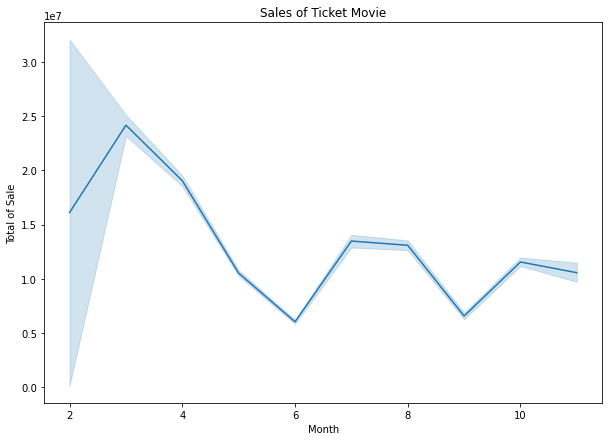

In [22]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['month'],y=df['total_sales'])
plt.title("Sales of Ticket Movie")
plt.xlabel("Month")
plt.ylabel("Total of Sale")

plt.show()

4-What is the film code there was highest no of Shows ?

/Users/ghalih/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


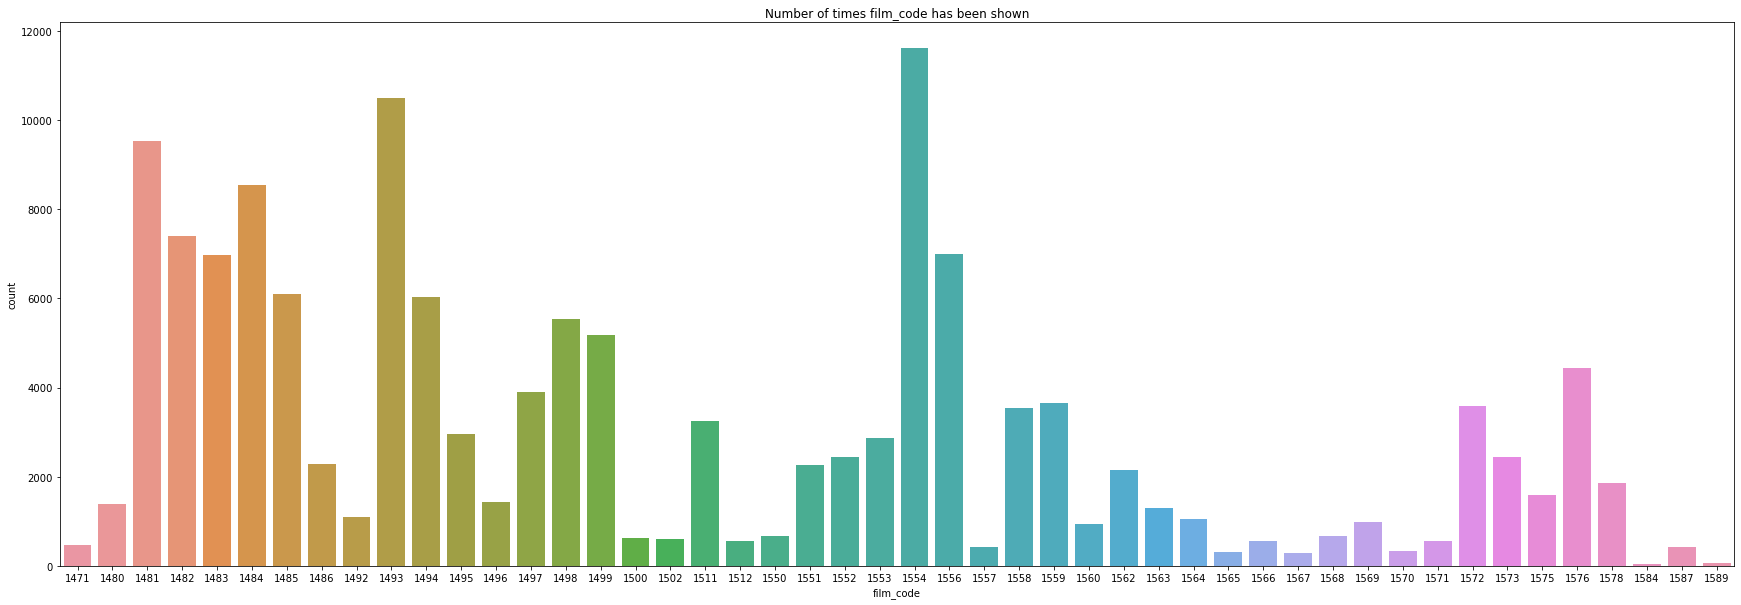

In [23]:
plt.figure(figsize=(30,10))
film = sns.countplot(df['film_code']);
film.set_title("Number of times film_code has been shown");

5-Which film_code has the most ticket_price?

In [24]:
df[['film_code', 'ticket_price']].groupby(['ticket_price'], sort = True).sum()

,film_code
ticket_price,
483.870968,1485
1600.000000,2966
2000.000000,1493
2061.855670,1481
2285.714286,1498
...,...
204444.444444,1569
280000.000000,1568
470000.000000,2988


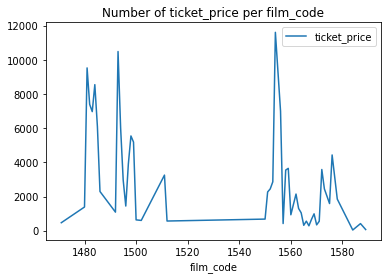

In [25]:
df[['film_code', 'ticket_price']].groupby('film_code').count().plot()
plt.title('Number of ticket_price per film_code');

6-Which show_time has the most tickets_sold ?

In [26]:
df[['show_time', 'tickets_sold']].groupby(['tickets_sold'], sort = True).sum()

,show_time
tickets_sold,
1,1043
2,5214
3,3844
4,6182
5,5253
...,...
7050,38
7121,38
7229,44


/Users/ghalih/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


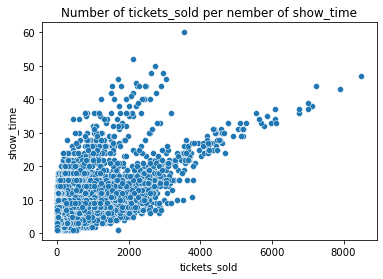

In [27]:
show = sns.scatterplot(df['tickets_sold'], df['show_time'])
show.set_title("Number of tickets_sold per nember of show_time");

In [32]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

KeyError: "['tickets_sold($)'] not in index"

7-Which day_name has the most number of sales?

/Users/ghalih/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


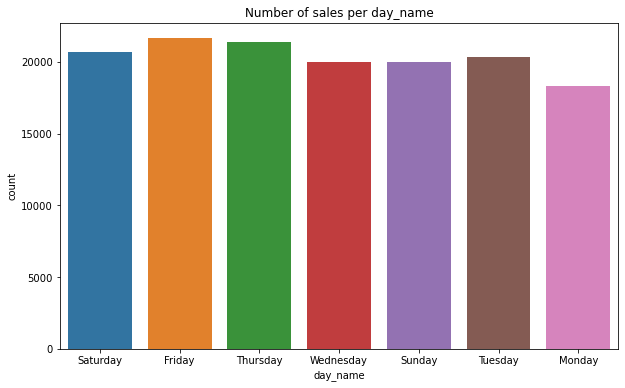

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Number of sales per day_name')
sns.countplot(df['day_name']);

8-Does ticket_price affect the  date of show?

In [31]:
df[['ticket_price', 'date']].groupby(['date'], sort = True).sum()

,ticket_price
date,
2018-02-21,1.199625e+05
2018-02-23,6.000000e+04
2018-03-14,1.648094e+07
2018-03-15,2.307049e+07
2018-03-16,2.737739e+07
...,...
2018-10-31,6.049211e+07
2018-11-01,6.531210e+07
2018-11-02,6.380986e+07


K-means cluster 